In [1]:
!pip install geopandas rasterio matplotlib seaborn pandas numpy


In [2]:
import os
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
import geopandas as gpd
print("GeoPandas imported successfully!")

import rasterio
print("Rasterio imported successfully!")

import numpy as np
print("NumPy imported successfully!")

import matplotlib.pyplot as plt
print("Matplotlib imported successfully!")

import seaborn as sns
print("Seaborn imported successfully!")

import pandas as pd
print("Pandas imported successfully!")


GeoPandas imported successfully!
Rasterio imported successfully!
NumPy imported successfully!
Matplotlib imported successfully!
Seaborn imported successfully!
Pandas imported successfully!


In [4]:
import os

# Set the correct relative path to the data folder
data_dir = os.path.join(os.getcwd(), "data")  # Ensure full path is used

# Define file paths for each dataset
admin_regions_fp = os.path.join(data_dir, "nepal_admin_regions.gpkg")
glaciers_fp = os.path.join(data_dir, "nepal_glaciers.gpkg")
rivers_fp = os.path.join(data_dir, "nepal_rivers.gpkg")
temp_2020_fp = os.path.join(data_dir, "nepal_temperature_2020.tif")
temp_2050_fp = os.path.join(data_dir, "nepal_temperature_2050.tif")
precip_2020_fp = os.path.join(data_dir, "nepal_precipitation_2020.tif")
precip_2050_fp = os.path.join(data_dir, "nepal_precipitation_2050.tif")


In [5]:

# Print file paths to verify correctness
print("Admin Regions Path:", admin_regions_fp)
print("Glaciers Path:", glaciers_fp)
print("Rivers Path:", rivers_fp)
print("Temperature 2020 Path:", temp_2020_fp)
print("Temperature 2050 Path:", temp_2050_fp)
print("Precipitation 2020 Path:", precip_2020_fp)
print("Precipitation 2050 Path:", precip_2050_fp)


Admin Regions Path: C:\Users\User\gis-data-science-assignment-anupagurung\data\nepal_admin_regions.gpkg
Glaciers Path: C:\Users\User\gis-data-science-assignment-anupagurung\data\nepal_glaciers.gpkg
Rivers Path: C:\Users\User\gis-data-science-assignment-anupagurung\data\nepal_rivers.gpkg
Temperature 2020 Path: C:\Users\User\gis-data-science-assignment-anupagurung\data\nepal_temperature_2020.tif
Temperature 2050 Path: C:\Users\User\gis-data-science-assignment-anupagurung\data\nepal_temperature_2050.tif
Precipitation 2020 Path: C:\Users\User\gis-data-science-assignment-anupagurung\data\nepal_precipitation_2020.tif
Precipitation 2050 Path: C:\Users\User\gis-data-science-assignment-anupagurung\data\nepal_precipitation_2050.tif


In [12]:
# Load vector data
admin_regions = gpd.read_file(admin_regions_fp)
glaciers = gpd.read_file(glaciers_fp)
rivers = gpd.read_file(rivers_fp)

In [13]:
# Load raster data
def load_raster(filepath):
    with rasterio.open(filepath) as src:
        return src.read(1), src.meta

In [14]:
# Load temperature and precipitation rasters
temp_2020, temp_meta = load_raster(temp_2020_fp)
temp_2050, _ = load_raster(temp_2050_fp)
precip_2020, _ = load_raster(precip_2020_fp)
precip_2050, _ = load_raster(precip_2050_fp)


In [15]:
# Compute temperature change
temp_diff = temp_2050 - temp_2020

# Compute precipitation change
precip_diff = precip_2050 - precip_2020

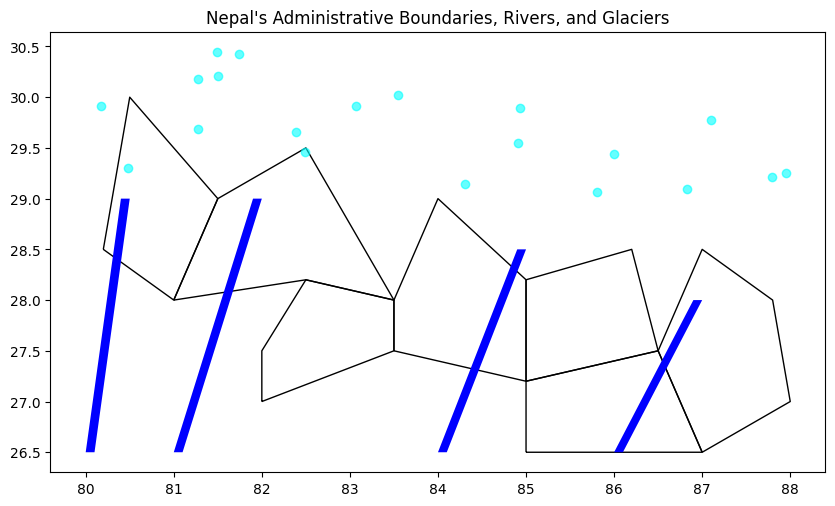

In [16]:
# Plot Nepal Map with Admin Boundaries, Rivers, and Glaciers
fig, ax = plt.subplots(figsize=(10, 6))
admin_regions.plot(ax=ax, color='none', edgecolor='black')
rivers.plot(ax=ax, color='blue', linewidth=0.5)
glaciers.plot(ax=ax, color='cyan', alpha=0.6)
plt.title("Nepal's Administrative Boundaries, Rivers, and Glaciers")
plt.show()

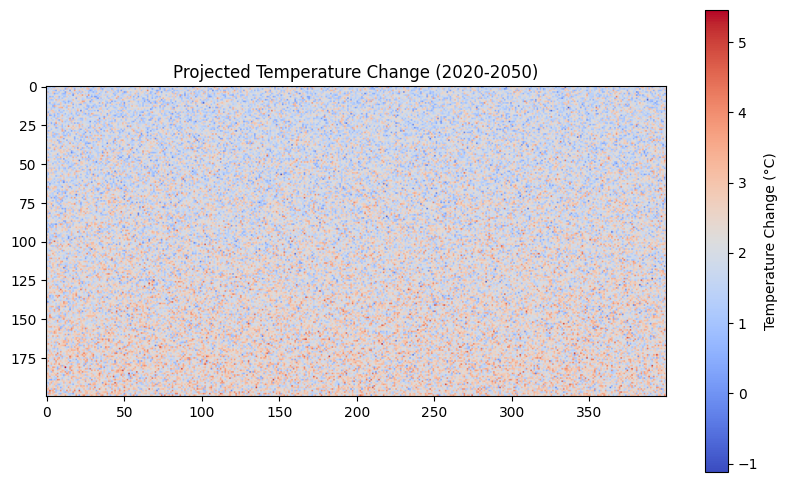

In [17]:

# Plot Temperature Difference
plt.figure(figsize=(10, 6))
plt.imshow(temp_diff, cmap="coolwarm")
plt.colorbar(label="Temperature Change (°C)")
plt.title("Projected Temperature Change (2020-2050)")
plt.show()

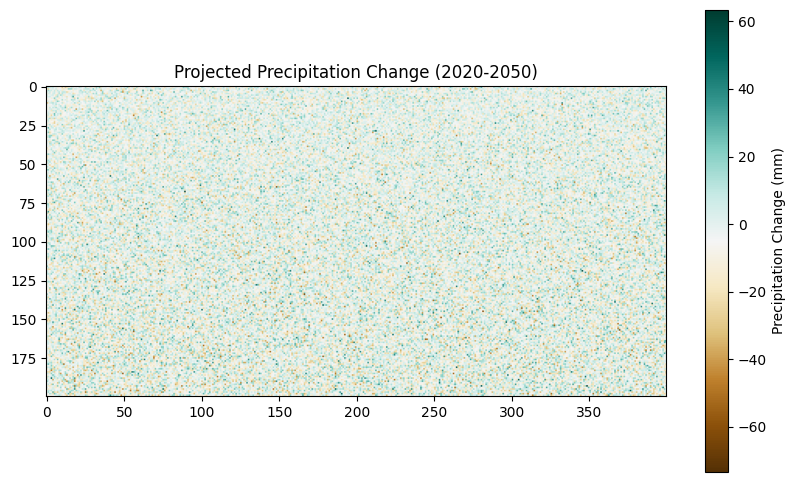

In [18]:
# Plot Precipitation Difference
plt.figure(figsize=(10, 6))
plt.imshow(precip_diff, cmap="BrBG")
plt.colorbar(label="Precipitation Change (mm)")
plt.title("Projected Precipitation Change (2020-2050)")
plt.show()

In [20]:
# Compute statistics
stats = {
    "Temperature 2020": [np.nanmin(temp_2020), np.nanmax(temp_2020), np.nanmean(temp_2020), np.nanmedian(temp_2020)],
    "Temperature 2050": [np.nanmin(temp_2050), np.nanmax(temp_2050), np.nanmean(temp_2050), np.nanmedian(temp_2050)],
    "Temperature Change": [np.nanmin(temp_diff), np.nanmax(temp_diff), np.nanmean(temp_diff), np.nanmedian(temp_diff)],
    "Precipitation 2020": [np.nanmin(precip_2020), np.nanmax(precip_2020), np.nanmean(precip_2020), np.nanmedian(precip_2020)],
    "Precipitation 2050": [np.nanmin(precip_2050), np.nanmax(precip_2050), np.nanmean(precip_2050), np.nanmedian(precip_2050)],
    "Precipitation Change": [np.nanmin(precip_diff), np.nanmax(precip_diff), np.nanmean(precip_diff), np.nanmedian(precip_diff)]
}
stats_df = pd.DataFrame(stats, index=["Min", "Max", "Mean", "Median"])
print(stats_df)


        Temperature 2020  Temperature 2050  Temperature Change  \
Min           -23.198750        -22.087363           -1.118208   
Max             8.138671         11.473132            5.458357   
Mean           -7.577416         -5.472907            2.104509   
Median         -7.685703         -5.578674            2.099549   

        Precipitation 2020  Precipitation 2050  Precipitation Change  
Min               6.856343           -6.410086            -73.330238  
Max             102.832674          134.969297             63.338033  
Mean             50.837965           48.285593             -2.552372  
Median           50.366545           46.742438             -2.379046  
